In [1]:
from utils.datasets import WildfireDataset, show_image

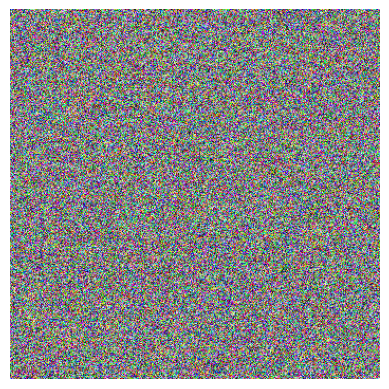

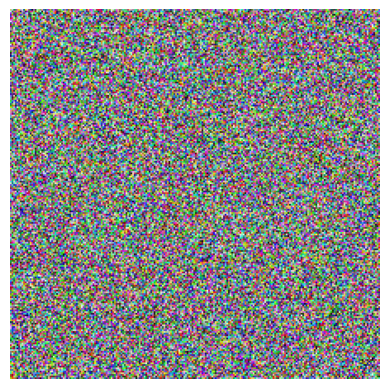

In [5]:
from torchvision import transforms
import torch 


x = transforms.CenterCrop(224)

random_img = torch.rand(3, 350, 350)
show_image(random_img)
show_image(x(random_img))

In [6]:
print(random_img.shape)
print(x(random_img).shape)

torch.Size([3, 350, 350])
torch.Size([3, 224, 224])


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train = WildfireDataset("/data/amathur-23/ROB313", split="train", labeled=True)
train_unlabeled = WildfireDataset(
    "/data/amathur-23/ROB313", split="train", labeled=False
)
val = WildfireDataset("/data/amathur-23/ROB313", split="val", labeled=True)
test = WildfireDataset("/data/amathur-23/ROB313", split="test", labeled=True)


print("Train:", len(train))
print("Train unlabeled:", len(train_unlabeled))
print("Val:", len(val))
print("Test:", len(test))

Loading meta file: /data/amathur-23/ROB313/train.csv


FileNotFoundError: [Errno 2] No such file or directory: '/data/amathur-23/ROB313/train.csv'

In [ ]:
sample = train_unlabeled[0]

In [ ]:
sample.keys()

dict_keys(['image', 'coords'])

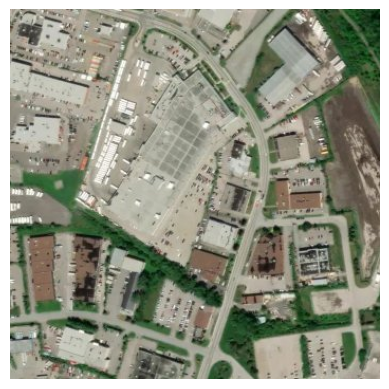

In [ ]:
img = sample["image"]
show_image(img)

In [ ]:
sample["coords"]

tensor([-75.7346,  45.4642])

In [ ]:
train.meta

,filename,coord_x,coord_y,label
0,/data/amathur-23/ROB313//valid/nowildfire/-123...,-123.034615,49.248318,nowildfire
1,/data/amathur-23/ROB313//valid/nowildfire/-79....,-79.475910,43.658522,nowildfire
2,/data/amathur-23/ROB313//valid/nowildfire/-73....,-73.755705,45.562646,nowildfire
3,/data/amathur-23/ROB313//valid/wildfire/-70.64...,-70.648140,50.879200,wildfire
4,/data/amathur-23/ROB313//valid/wildfire/-77.02...,-77.024780,46.277880,wildfire
...,...,...,...,...
5035,/data/amathur-23/ROB313//valid/nowildfire/-73....,-73.906629,45.631967,nowildfire
5036,/data/amathur-23/ROB313//valid/wildfire/-73.73...,-73.731220,47.898080,wildfire
5037,/data/amathur-23/ROB313//valid/wildfire/-70.47...,-70.473850,49.195440,wildfire
5038,/data/amathur-23/ROB313//valid/wildfire/-74.98...,-74.981880,49.830940,wildfire


In [ ]:
train.meta["int_label"] = [int(x == "wildfire") for x in train.meta["label"]]
val.meta["int_label"] = [int(x == "wildfire") for x in val.meta["label"]]
test.meta["int_label"] = [int(x == "wildfire") for x in test.meta["label"]]

In [ ]:
train.meta.corr(numeric_only=True)

,coord_x,coord_y,int_label
coord_x,1.000000,-0.417330,0.586662
coord_y,-0.417330,1.000000,0.186952
int_label,0.586662,0.186952,1.000000


In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train, batch_size=32, shuffle=True)
val_loader = DataLoader(val, batch_size=32, shuffle=False)
test_loader = DataLoader(test, batch_size=32, shuffle=False)
train_unlabeled_loader = DataLoader(train_unlabeled, batch_size=32, shuffle=True)

In [ ]:
# from tqdm import tqdm

# # Initialize lists to store mean and std values for each channel
# mean_r, mean_g, mean_b = [], [], []
# std_r, std_g, std_b = [], [], []

# # Iterate through the dataset
# for sample in tqdm(train_unlabeled):
#     img = sample["image"]
#     mean_r.append(img[0].mean().item())
#     mean_g.append(img[1].mean().item())
#     mean_b.append(img[2].mean().item())
#     std_r.append(img[0].std().item())
#     std_g.append(img[1].std().item())
#     std_b.append(img[2].std().item())

# # Compute the overall mean and std for each channel
# mean_r = np.mean(mean_r)
# mean_g = np.mean(mean_g)
# mean_b = np.mean(mean_b)
# std_r = np.mean(std_r)
# std_g = np.mean(std_g)
# std_b = np.mean(std_b)

# print(f"Mean R: {mean_r}, Mean G: {mean_g}, Mean B: {mean_b}")
# print(f"Std R: {std_r}, Std G: {std_g}, Std B: {std_b}")

In [ ]:
# mean_r = np.mean(mean_r)
# mean_g = np.mean(mean_g)
# mean_b = np.mean(mean_b)
# std_r = np.mean(std_r)
# std_g = np.mean(std_g)
# std_b = np.mean(std_b)

# print(f"Mean R: {mean_r}, Mean G: {mean_g}, Mean B: {mean_b}")
# print(f"Std R: {std_r}, Std G: {std_g}, Std B: {std_b}")

In [ ]:
# from tqdm import tqdm

# for batch in tqdm(train_loader):
#     continue

# for batch in tqdm(val_loader):
#     continue

# for batch in tqdm(test_loader):
#     continue

# for batch in tqdm(train_unlabeled_loader):
#     continue

In [ ]:
from collections import Counter

train_labels_count = Counter(train.meta["label"])
val_labels_count = Counter(val.meta["label"])
test_labels_count = Counter(test.meta["label"])

print("Train labels count:", train_labels_count)
print("Val labels count:", val_labels_count)
print("Test labels count:", test_labels_count)

Train labels count: Counter({'wildfire': 2796, 'nowildfire': 2244})
Val labels count: Counter({'wildfire': 684, 'nowildfire': 576})
Test labels count: Counter({'wildfire': 3479, 'nowildfire': 2820})


In [ ]:
from utils.augmentations import ContrastiveTransformations

clr_transforms = ContrastiveTransformations(img_size=350)

clr_set = WildfireDataset(
    "/data/amathur-23/ROB313", split="train", labeled=True, transforms=clr_transforms
)

Loading meta file: /data/amathur-23/ROB313/train.csv


In [ ]:
i = 0

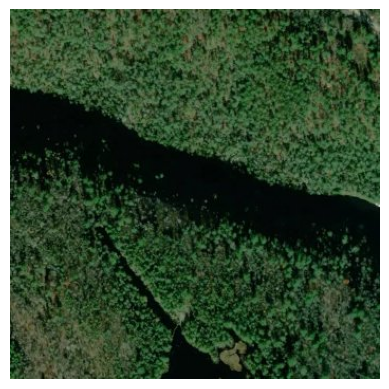

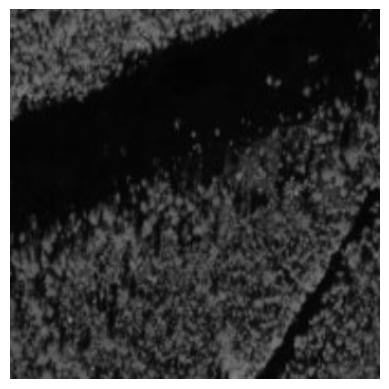

In [ ]:
i += 1
sample = clr_set[i]
im1, im2 = sample["image"]

show_image(im1)
show_image(im2)